## file Load

In [4]:
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import json
# 지도 매핑
import folium
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [85]:
import geopandas as gpd
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from folium.features import GeoJson

In [45]:
df = gpd.read_file('./PJT001_h_100m_cell_pop.geojson.txt')

In [96]:
tmp = df[:1000]
len(tmp)

1000

In [98]:
# m = folium.Map()
# m.add_child(df)
m = folium.Map(location=[45.137451890638886,-68.13734351262877], zoom_start=5)
for index, row in df.iterrows():
    GeoJson(
        row['geometry'],
        name='geojson'
    ).add_to(m)

In [99]:
m.save("test.html")

In [70]:
df.columns

Index(['id', 'pop_mn_0_9', 'pop_mn_10_', 'pop_mn_20_', 'pop_mn_30_',
       'pop_mn_40_', 'pop_mn_50_', 'pop_mn_60_', 'pop_mn_70_', 'pop_mn_80_',
       'pop_mn_90_', 'pop_mn_ttl', 'pop_wmn_0_', 'pop_wmn_10', 'pop_wmn_20',
       'pop_wmn_30', 'pop_wmn_40', 'pop_wmn_50', 'pop_wmn_60', 'pop_wmn_70',
       'pop_wmn_80', 'pop_wmn_90', 'pop_wmn_tt', 'pop_ttl', 'emd_cd',
       'geometry'],
      dtype='object')

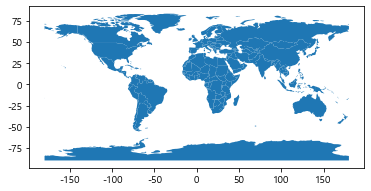

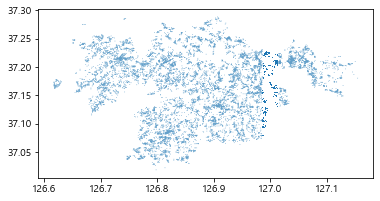

In [47]:
df["geometry"].plot()

In [50]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

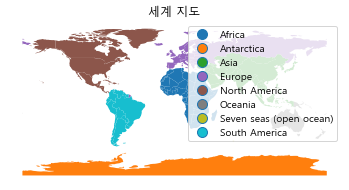

In [53]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

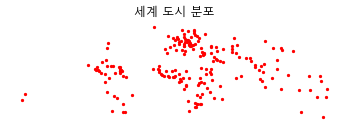

In [56]:
base = df.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

KeyError: 'test'

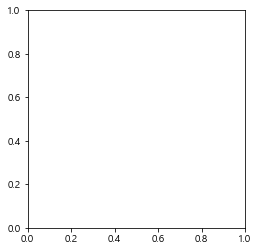

In [52]:
ax = countries.plot(column='test', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

In [15]:
type(df.geometry)


geopandas.geoseries.GeoSeries